Figure 4A in Mahdavi et al. (2021) Environmental Pollution

This figure compares particle size distribution (PSD) measured by airborne samples and QFF in the studied home.

Plot type: Line plot

In [1]:
import sys
sys.modules[__name__].__dict__.clear()

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import container
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Data preprocessing and preparation

df = pd.read_excel(backslash_correct(r'C:\PhD Research\QFF Evaluation\Processed\psd_sci_dsitributed.xlsx'))
psd = pd.read_excel(backslash_correct(r'C:\PhD Research\QFF Evaluation\Processed\psd_qff.xlsx'))

l1 = [0.251, 0.501, 1, 2.51, 10] 

df_1 = df[df['Size'] == 0.251][['Size', 'Mass Perc']]
df_2 = df[df['Size'] == 0.501][['Size', 'Mass Perc']]
df_3 = df[df['Size'] == 1][['Size', 'Mass Perc']]
df_4 = df[df['Size'] == 2.51][['Size', 'Mass Perc']]
df_5 = df[df['Size'] == 10][['Size', 'Mass Perc']]

ls_dict = {1: '--',
           2: '-',
           3: '-',
           4: '-',
           5: '-',
           6: '--'}


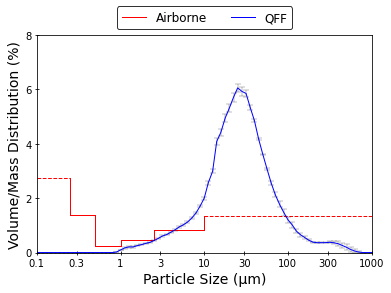

In [3]:
### Figure

plt.figure()

i = 1
for s in df['FP'].unique():
    plt.plot(df[df['FP'] == s]['Size'], df[df['FP'] == s]['Mass Perc'], 
                 c = 'r', linewidth = 1, ls = ls_dict[i])
    i += 1

plt.plot(df_1['Size'], df_1['Mass Perc'], c = 'r', linewidth = 1, label = 'Airborne')
plt.plot(df_2['Size'], df_2['Mass Perc'], c = 'r', linewidth = 1)
plt.plot(df_3['Size'], df_3['Mass Perc'], c = 'r', linewidth = 1)
plt.plot(df_4['Size'], df_4['Mass Perc'], c = 'r', linewidth = 1)
plt.plot(df_5['Size'], df_5['Mass Perc'], c = 'r', linewidth = 1)

plt.errorbar(psd['Size'], psd['qff psd'], 
             yerr = (psd['qff psd error'], psd['qff psd error']), 
             c = 'b', linewidth = 1, label = 'QFF',
             capsize = 3, ecolor = 'k', elinewidth = 0.25, capthick = 0.25)

plt.xscale('log')
   
a = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xlim(0.1, 1000)
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 8)
plt.yticks(np.arange(0, 9, step=2))
plt.ylabel('Volume/Mass Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 12, bbox_to_anchor=(0.78, 1.16), ncol = 2)
plt.savefig(r'C:/PhD Research/QFF Evaluation/Processed/plots/Figure4a.jpg', format='jpg', dpi=1600, bbox_inches='tight')

End of Code